# Plots from workflow logs

This notebook demonstrates the use of `pandas` to analyse logs from the `wflogger` LOTUS workflow logging tool.

In [1]:
import sys
sys.path.insert(0, "..")

import wflogger.analysis as wfa

# Reloading is required when developing the: wflogger.analysis library (but not in standard use)
import importlib
import wflogger.analysis
wfa = importlib.reload(wflogger.analysis)

## Decide which workflow and tags you want to look at

I want to compare two runs:


In [2]:
sel_1 = {
    "workflow": "my-model-2",
    "tag": "idl-version"
}

sel_2 = {
    "workflow": "my-model-2",
    "tag": "python-version"
}

In [3]:
df1 = wfa.get_results(workflow=sel_1["workflow"], tag=sel_1["tag"])
df2 = wfa.get_results(workflow=sel_2["workflow"], tag=sel_2["tag"])

Converted 800 records.
Converted 1200 records.


In [4]:
df2.head()

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag,duration
0,14335908,astephen,host073.jc.rl.ac.uk,my-model-2,python-version,1,start,1,2022-03-31 02:40:35.421799,,-999,0.0
1,14335909,astephen,host073.jc.rl.ac.uk,my-model-2,python-version,2,read,1,2022-03-31 02:40:45.921799,,-999,10.5
2,14335910,astephen,host073.jc.rl.ac.uk,my-model-2,python-version,3,process,1,2022-03-31 02:41:00.021799,,-999,14.1
3,14335911,astephen,host073.jc.rl.ac.uk,my-model-2,python-version,4,summarise,1,2022-03-31 02:41:04.021799,,-999,4.0
4,14335912,astephen,host519.jc.rl.ac.uk,my-model-2,python-version,1,start,2,2022-03-31 02:41:04.031799,,-999,0.0


In [5]:
wfa = importlib.reload(wflogger.analysis)

## Let's view the different tags in separate plots

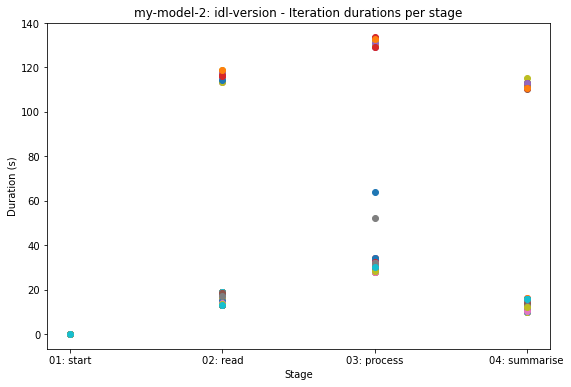

In [7]:
wfa.plot_stage_durations_by_iteration(df1)

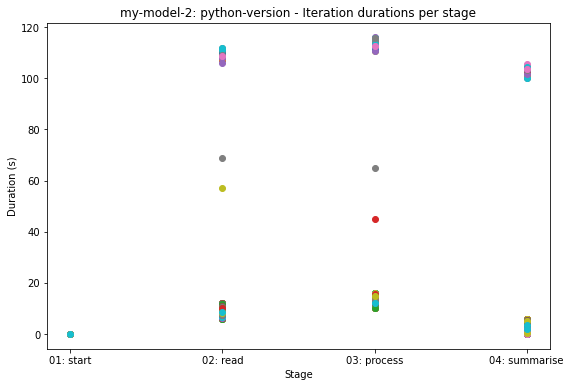

In [8]:
wfa.plot_stage_durations_by_iteration(df2)

### Let's compare the maximum durations of each stage for each tag

In order to view the differences better, we are plotting a log scale on the y-axis:

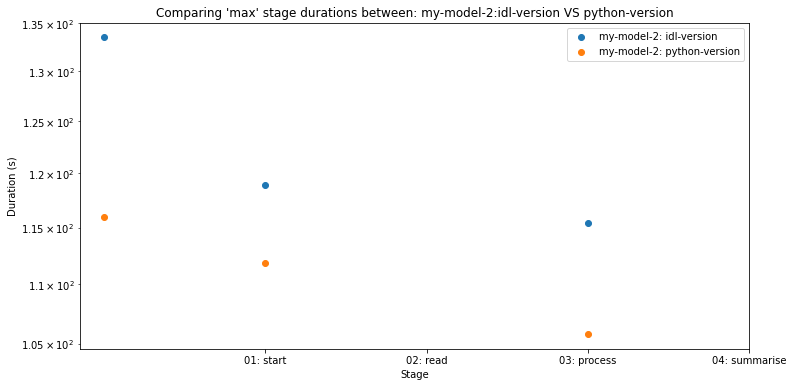

In [9]:
wfa = importlib.reload(wflogger.analysis)
wfa.plot_comparison_of_two_workflow_tags(df1, df2, "max", yscale="log")

### Let's look for outliers

We can identify outliers as those beyond N standard deviations from the mean.

In [10]:
import numpy as np

def get_outliers(df, n_std_deviations=3):
    return df[np.abs(df.duration - df.duration.mean()) <= (n_std_deviations * df.duration.std())]

df1_outliers = get_outliers(df1)

In [11]:
df1_outliers.head()
print(df1_outliers.iloc[3].duration)
print(df1_outliers.duration.mean())

13.0
14.824476439790578


Which hosts are the outliers on?

In [12]:
print(sorted(df1_outliers.hostname.unique()))

['host071.jc.rl.ac.uk', 'host074.jc.rl.ac.uk', 'host075.jc.rl.ac.uk', 'host080.jc.rl.ac.uk', 'host101.jc.rl.ac.uk', 'host102.jc.rl.ac.uk', 'host112.jc.rl.ac.uk', 'host113.jc.rl.ac.uk', 'host119.jc.rl.ac.uk', 'host121.jc.rl.ac.uk', 'host123.jc.rl.ac.uk', 'host125.jc.rl.ac.uk', 'host126.jc.rl.ac.uk', 'host128.jc.rl.ac.uk', 'host137.jc.rl.ac.uk', 'host141.jc.rl.ac.uk', 'host142.jc.rl.ac.uk', 'host150.jc.rl.ac.uk', 'host155.jc.rl.ac.uk', 'host165.jc.rl.ac.uk', 'host166.jc.rl.ac.uk', 'host169.jc.rl.ac.uk', 'host172.jc.rl.ac.uk', 'host174.jc.rl.ac.uk', 'host176.jc.rl.ac.uk', 'host179.jc.rl.ac.uk', 'host181.jc.rl.ac.uk', 'host182.jc.rl.ac.uk', 'host188.jc.rl.ac.uk', 'host198.jc.rl.ac.uk', 'host199.jc.rl.ac.uk', 'host200.jc.rl.ac.uk', 'host210.jc.rl.ac.uk', 'host219.jc.rl.ac.uk', 'host224.jc.rl.ac.uk', 'host233.jc.rl.ac.uk', 'host234.jc.rl.ac.uk', 'host236.jc.rl.ac.uk', 'host237.jc.rl.ac.uk', 'host241.jc.rl.ac.uk', 'host248.jc.rl.ac.uk', 'host249.jc.rl.ac.uk', 'host251.jc.rl.ac.uk', 'host253.j

In [13]:
df1_outliers["hostname"].value_counts().sort_values(ascending=False)

host652.jc.rl.ac.uk    12
host517.jc.rl.ac.uk    12
host562.jc.rl.ac.uk    12
host358.jc.rl.ac.uk    12
host438.jc.rl.ac.uk     8
                       ..
host128.jc.rl.ac.uk     1
host123.jc.rl.ac.uk     1
host112.jc.rl.ac.uk     1
host125.jc.rl.ac.uk     1
host126.jc.rl.ac.uk     1
Name: hostname, Length: 166, dtype: int64

In [15]:
df1_outliers.loc[:, ["hostname", "duration"]].sort_values("duration", ascending=False)

,hostname,duration
362,host443.jc.rl.ac.uk,64.0
230,host402.jc.rl.ac.uk,52.0
26,host566.jc.rl.ac.uk,34.0
466,host319.jc.rl.ac.uk,34.0
722,host233.jc.rl.ac.uk,34.0
...,...,...
420,host234.jc.rl.ac.uk,0.0
416,host102.jc.rl.ac.uk,0.0
412,host126.jc.rl.ac.uk,0.0
408,host411.jc.rl.ac.uk,0.0


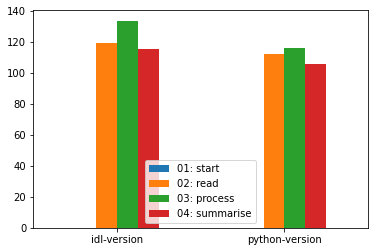

In [17]:
wfa.plot_bar_chart_comparing_tags(df1, df2)

## Next thoughts

Some things we can do with hostname:
 1. Look at outliers and whether certain hosts are the problem
 2. Add host groups to the dataframes:
   - by architecture?
   - by numbered groups: e.g. `host100-199`, `host200-299`, etc.
 3. Then compare the durations by different groups.

In [18]:
# some testing...
def add_hostset_column(df):
    df["hostset"] = df["hostname"].str[4] + "00"
    
add_hostset_column(df1)

In [19]:
df1.head()

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag,duration,hostset
0,14335108,astephen,host575.jc.rl.ac.uk,my-model-2,idl-version,1,start,1,2022-03-30 21:54:09.961799,,-999,0.0,500
1,14335109,astephen,host575.jc.rl.ac.uk,my-model-2,idl-version,2,read,1,2022-03-30 21:54:23.461799,,-999,13.5,500
2,14335110,astephen,host575.jc.rl.ac.uk,my-model-2,idl-version,3,process,1,2022-03-30 21:54:54.361799,,-999,30.9,500
3,14335111,astephen,host575.jc.rl.ac.uk,my-model-2,idl-version,4,summarise,1,2022-03-30 21:55:07.361799,,-999,13.0,500
4,14335112,astephen,host493.jc.rl.ac.uk,my-model-2,idl-version,1,start,2,2022-03-30 21:55:10.161799,,-999,0.0,400


In [20]:
def add_hostgroup_column(df):
    return 

/tmp/ipykernel_533/3437850104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  boxplot = df1.groupby("hostset")[("duration", "stage")].boxplot(column=["duration"]) #column=['Col1', 'Col2', 'Col3'])


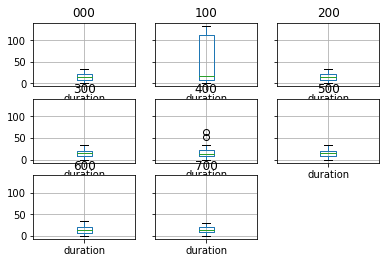

In [21]:
boxplot = df1.groupby("hostset")[("duration", "stage")].boxplot(column=["duration"]) #column=['Col1', 'Col2', 'Col3'])

In [22]:
# Or, better in a single plot
df1_stats = df1.loc[:, ["stage_number", "stage", "hostset", "duration"]].sort_values("stage_number") #.drop("stage_number")

def get_stage_name(row):
    return f"{row.stage_number:02d}:{row.stage}"

df1_stats["stage_name"] = df1_stats.apply(get_stage_name, axis=1)

01:start             AxesSubplot(0.1,0.15;0.173913x0.75)
02:read         AxesSubplot(0.308696,0.15;0.173913x0.75)
03:process      AxesSubplot(0.517391,0.15;0.173913x0.75)
04:summarise    AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

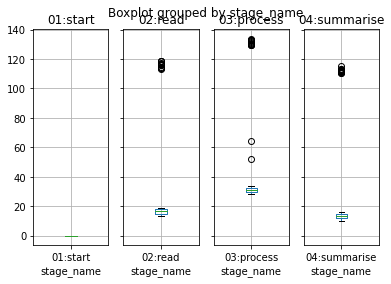

In [23]:
df1_stats.head()
df1_stats.groupby(["stage_name"]).boxplot(column=["duration"], by="stage_name", layout=(1, 4))

01:start             AxesSubplot(0.1,0.15;0.173913x0.75)
02:read         AxesSubplot(0.308696,0.15;0.173913x0.75)
03:process      AxesSubplot(0.517391,0.15;0.173913x0.75)
04:summarise    AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

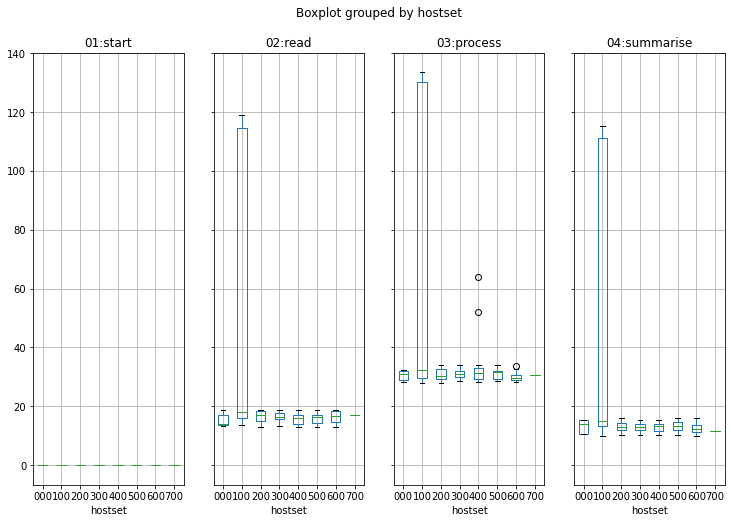

In [24]:
df1_stats.groupby(["stage_name"]).boxplot(column=["duration"], by="hostset", layout=(1, 4), figsize=(12, 8))

## Wow, the hostset 100-199 seems to have higher values!